In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from fci import FCI
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['lines.markeredgewidth'] = 3
plt.rcParams.update({'font.size': 18})

# Results

## Part b)

Plotting E as a function of Z

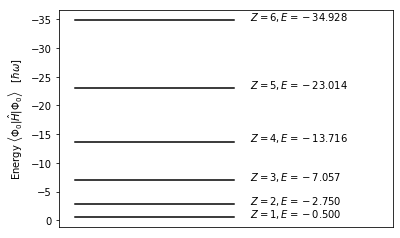

In [3]:
Z = np.arange(1, 7)
energies = [FCI(Z=z).Eref for z in Z]
fig, ax = plt.subplots()
#ax.set_color_cycle(plt.get_cmap("Blues"))
for energy in energies:
    ax.plot((0, 1), (energy, energy), 'k-')
# ax.plot(Z, energies, '-o')
# ax.set_xlabel(r'Z')
ax.xaxis.set_ticks_position('none')
ax.xaxis.set_visible(None)
ax.set_ylabel(r'Energy $\left\langle \Phi_0 \left| \hat{H} \right| \Phi_0\right\rangle \quad [\hbar\omega$]')
ax.set_xlim(-0.1, 2)
for (x, y) in zip(Z, energies):
    ax.annotate(f"$Z = {x:g}, E = {y:.3f}$", xy=(1.1, y))
ax.invert_yaxis()
fig.savefig('figures/efunctionofz.eps')
plt.show()

## Part c)

In [4]:
from matrixelementparser import MatrixElementParser 
parser = MatrixElementParser()

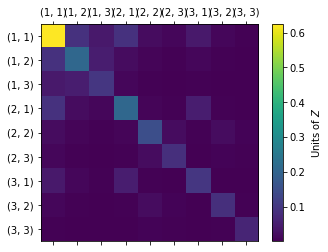

In [5]:
fig, ax = parser.show()
fig.savefig('figures/partbmatrix.eps')

Comparing $E_{ref}$ with $E[\Phi]_{FCI}$

In [6]:
print("E_Ref = ", FCI(Z=2).Eref)
print("E[Phi] = ", FCI(Z=2).energy_states()[0][0])

E_Ref =  -2.75
E[Phi] =  -2.8386484527787825


# Part d)

Same stuff, but for the Beryllium atom

In [7]:
print("E_Ref = ", FCI(Z=4).Eref)
print("E[Phi] = ", FCI(Z=4).energy_states()[0][0])

E_Ref =  -13.715995799039781
E[Phi] =  -14.362107983144607


# Part f) and g)

The new single-particle energies and new ground state energy after the first diagonalization.

In [8]:
from hfock import solve_hfock

energiesHe, hfockHe = solve_hfock(FCI(Z=2), tol=1e-15, max_itr=30, verbose=True)
print(f"First iteration {energiesHe[1]:.5f}\t{len(hfockHe)}th iteration: {energiesHe[-1]:.5f}")
print(f"First iteration {hfockHe[1]}\n{len(hfockHe)}th iteration: {hfockHe[-1]}")

Reference energy:  -2.75
Iteration     energy:        ∑_i |ϵ^n_i−ϵ^{n−1}_i| /n    ionization energies
     1        -2.82919       inf                         [-0.783 -0.783  0.04   0.04   0.453  0.453]
     2        -2.83106       0.0327351                   [-0.872 -0.872  0.04   0.04   0.444  0.444]
     3        -2.8311        0.00617802                  [-0.886 -0.886  0.039  0.039  0.44   0.44 ]
     4        -2.8311        0.000759482                 [-0.888 -0.888  0.039  0.039  0.44   0.44 ]
     5        -2.8311        9.27212e-05                 [-0.888 -0.888  0.039  0.039  0.44   0.44 ]
     6        -2.8311        1.21383e-05                 [-0.888 -0.888  0.039  0.039  0.44   0.44 ]
     7        -2.8311        1.72565e-06                 [-0.888 -0.888  0.039  0.039  0.44   0.44 ]
     8        -2.8311        2.64287e-07                 [-0.888 -0.888  0.039  0.039  0.44   0.44 ]
     9        -2.8311        4.2853e-08                  [-0.888 -0.888  0.039  0.039  0.4

In [9]:
energiesBe, hfockBe = solve_hfock(FCI(Z=4), tol=1e-15, max_itr=30, verbose=True)
print(f"First iteration {energiesBe[1]:.5f}\t{len(hfockBe)}th iteration: {energiesBe[-1]:.5f}")
print(f"First iteration {hfockBe[1]}\n{len(hfockBe)}th iteration: {hfockBe[-1]}")

Reference energy:  -13.715995799039781
Iteration     energy:        ∑_i |ϵ^n_i−ϵ^{n−1}_i| /n    ionization energies
     1        -14.4998       inf                         [-3.951 -3.951 -0.104 -0.104  0.866  0.866]
     2        -14.508        0.303471                    [-4.629 -4.629 -0.296 -0.296  0.825  0.825]
     3        -14.5082       0.0228789                   [-4.678 -4.678 -0.304 -0.304  0.814  0.814]
     4        -14.5083       0.00361589                  [-4.685 -4.685 -0.305 -0.305  0.812  0.812]
     5        -14.5083       0.000604125                 [-4.687 -4.687 -0.305 -0.305  0.811  0.811]
     6        -14.5083       0.000101201                 [-4.687 -4.687 -0.305 -0.305  0.811  0.811]
     7        -14.5083       1.69169e-05                 [-4.687 -4.687 -0.305 -0.305  0.811  0.811]
     8        -14.5083       2.82404e-06                 [-4.687 -4.687 -0.305 -0.305  0.811  0.811]
     9        -14.5083       4.71141e-07                 [-4.687 -4.687 -0.3